In [1]:
from importlib import reload
import test_models as mod1
mod1 = reload(mod1)

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from collections import Counter

In [2]:
kwargs = mod1.yaml_loader('./config.yaml')
df = mod1.load_data(kwargs['dir_data'], 'creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


284807
227422


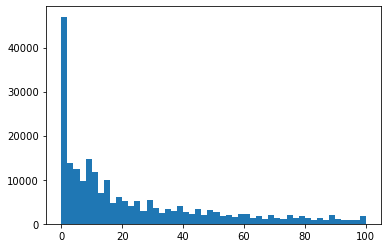

In [3]:
amounts = list(df['Amount'])
print(len(amounts))
amounts = [i for i in amounts if i < 100]
print(len(amounts))

plt.hist(amounts, bins = 50)
plt.show()

number of figures :  31


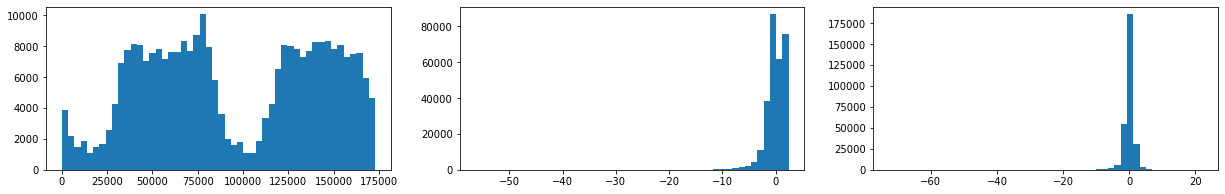

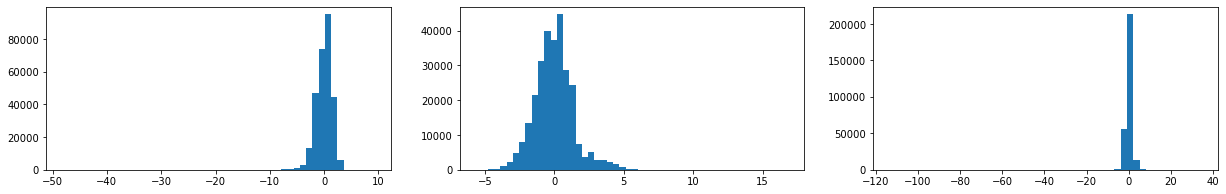

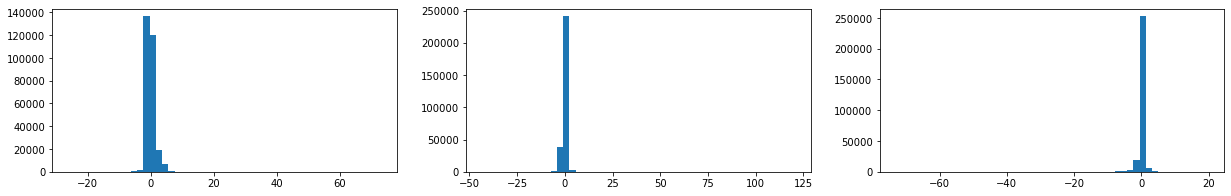

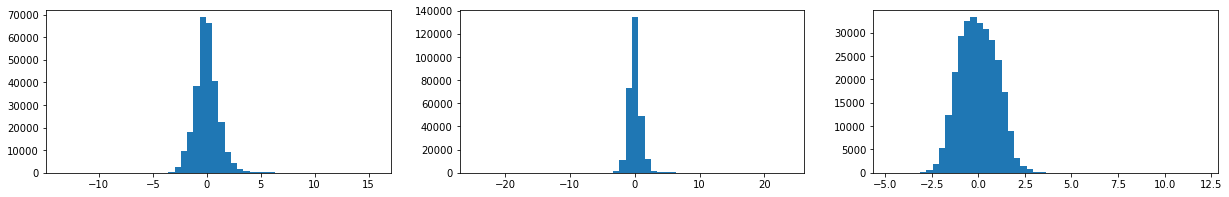

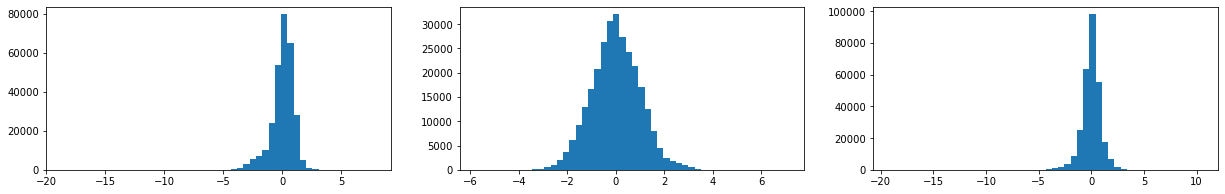

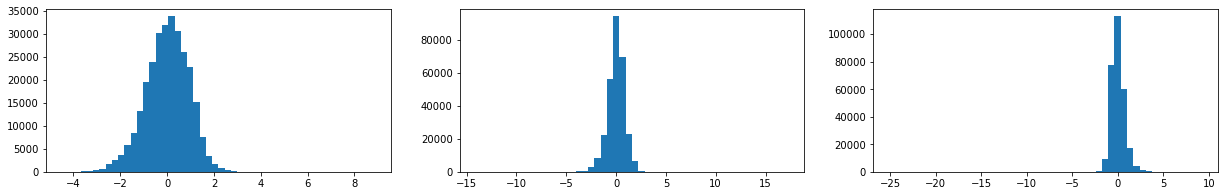

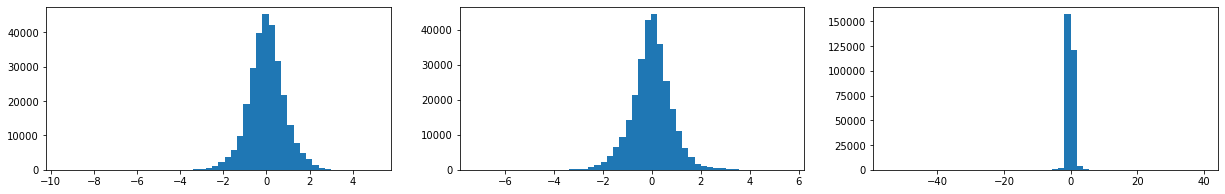

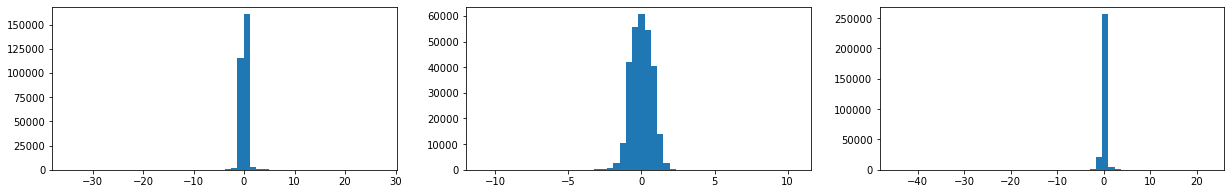

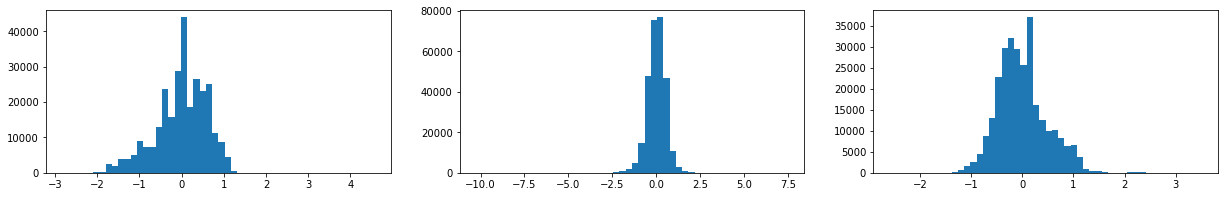

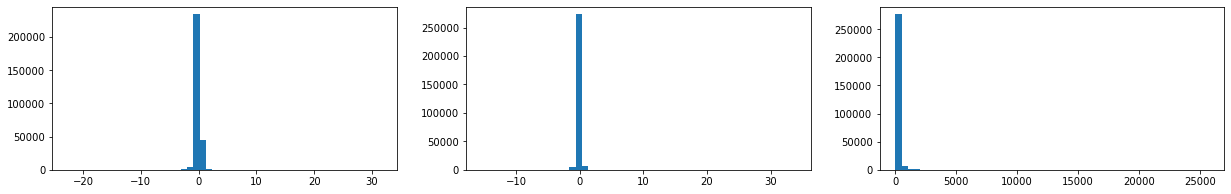

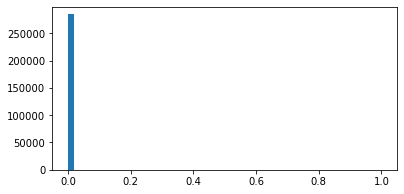

In [4]:
def hist_features(df):
    df_keys = df.keys()
    df_len = len(df_keys)
    print('number of figures : ', df_len)
    for i in range(0,df_len,3):
        plt.figure(i, figsize=(21,3))
        plt.subplot(131)
        plt.hist(df[df_keys[i]], bins=50)
        if i+1 < df_len:
            plt.subplot(132)
            plt.hist(df[df_keys[i+1]], bins=50)
        if i+2 < df_len:
            plt.subplot(133)
            plt.hist(df[df_keys[i+2]], bins=50)
    plt.show()
hist_features(df)

number of figures :  28


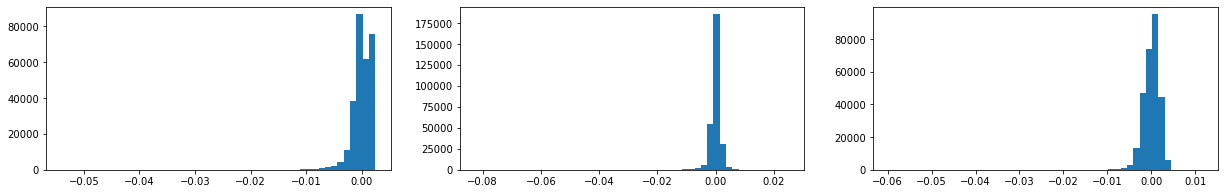

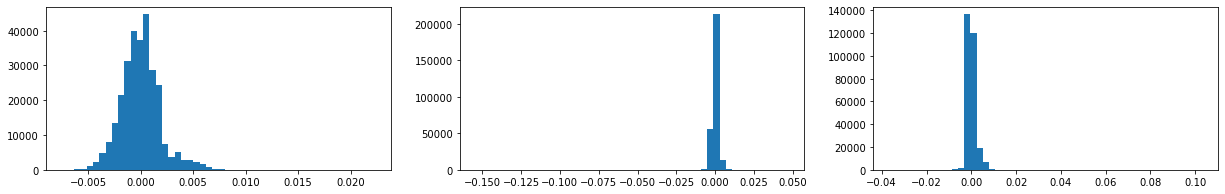

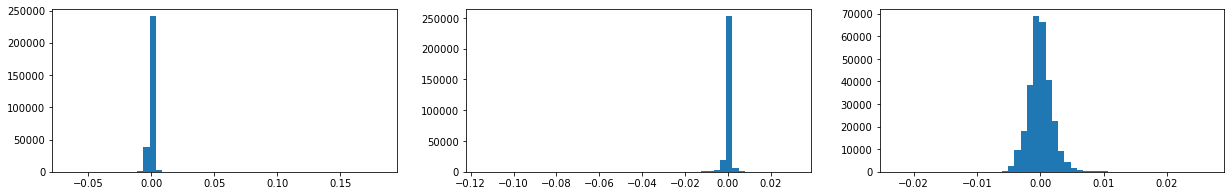

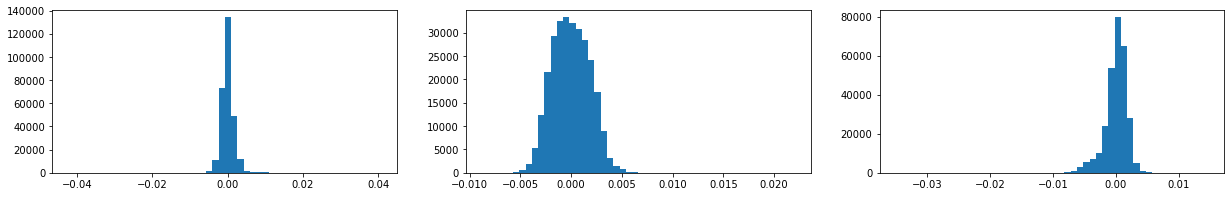

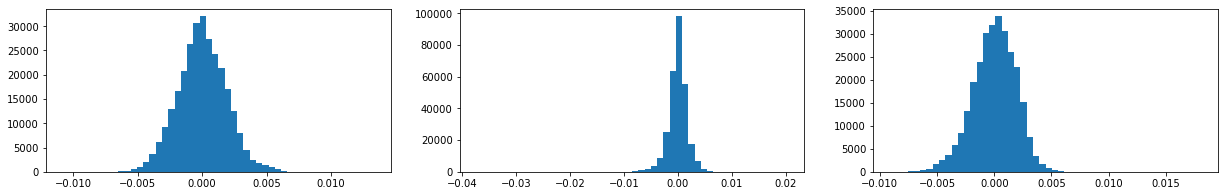

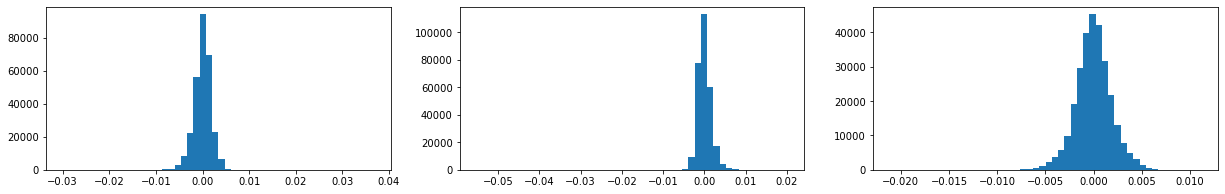

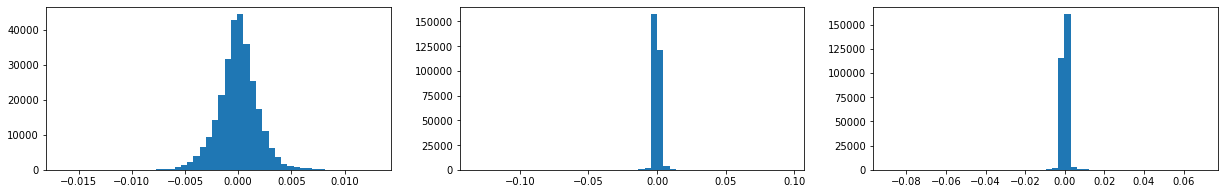

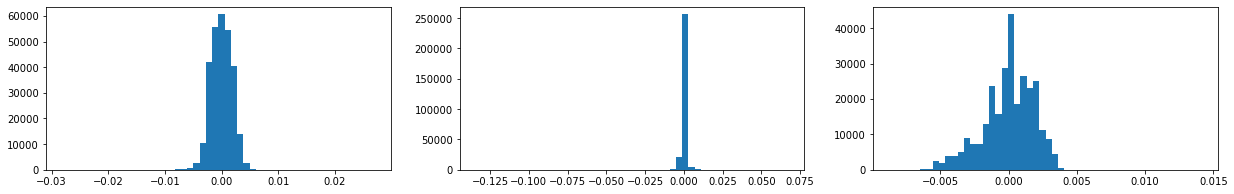

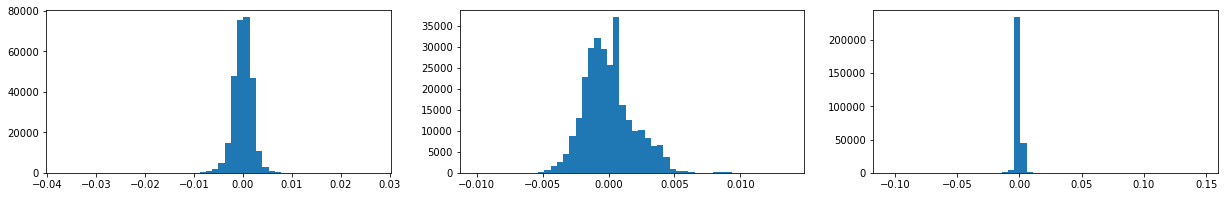

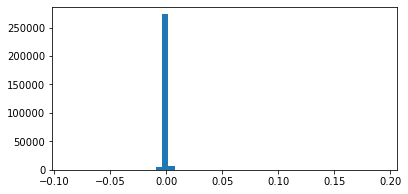

In [5]:
def hist_dict(dict_df):
    dict_len = len(dict_df)
    print('number of figures : ', dict_len)
    for i, (_, value) in enumerate(dict_df.items()):
        if i < dict_len and i%3 == 0:
            plt.figure(i, figsize=(21,3))
            plt.subplot(131)
            plt.hist(value, bins = 50)
        if i < dict_len and i%3 == 1:
            plt.subplot(132)
            plt.hist(value, bins = 50)
        if i < dict_len and i%3 == 2:
            plt.subplot(133)
            plt.hist(value, bins = 50)
    plt.show()
    
dict_df = mod1.build_dict_feature(df)
hist_dict(dict_df)

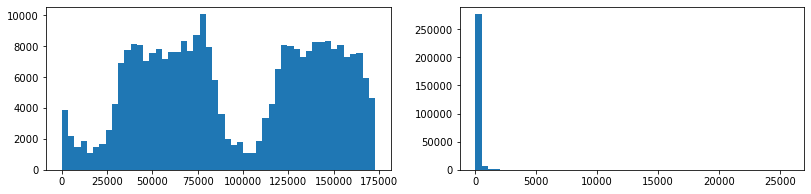

In [6]:
plt.figure(1,figsize=(21,3))
plt.subplot(131)
plt.hist(df['Time'], bins=50)
plt.subplot(132)
plt.hist(df['Amount'], bins=50)
plt.show()

In [7]:
cnt = Counter(df['Class'])
print(cnt)

Counter({0: 284315, 1: 492})


Amount mean : 88.35
Amount std  : 250.12


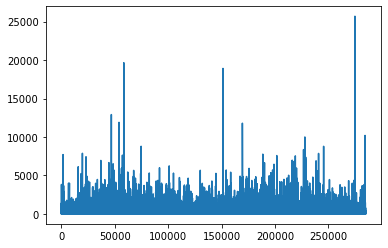

In [8]:
amounts = list(df['Amount'])
plt.plot(amounts)
print('Amount mean : {:.2f}'.format(np.mean(amounts)))
print('Amount std  : {:.2f}'.format(np.std(amounts)))
plt.show()